In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
abc = pd.read_excel('Data Assignment.xlsx')
xyz = pd.read_excel('Data Assignment.xlsx',sheet_name = 'Associate XYZ')
klm = pd.read_excel('Data Assignment.xlsx',sheet_name = 'Associlate KLM')

## SUMMARY :
- This is a dataset of 3 employs.The dataset contains the employs details of working productivity based on their time spent on each lead to the total no of leads.



## Column descriptions

**Date** : The date of lead generation activities.

**Employee Name** : A unique identifier for each employee (This will be the name of the sheet)

**Leads_Generated** : The number of leads generated by each employee on a specific date.

**Time_Spent (in mins)** : The total time spent by each employee on lead generation activities on a specific date. The unit of measurement is minutes






## Data visualisation:
Checking for total Null Values, duplicate values 
Finding Mean, Median, Mode & Standard deviation

**Identifying potential issues:**
Analysing and identifying potential problems with the data such missing values, leaves, Duplicate values etc which hampers the productivity.




In [3]:
abc.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,2.0,300.0
1,2023-01-10,1.0,300.0
2,2023-01-11,5.0,300.0
3,2023-01-12,4.0,300.0
4,2023-01-13,5.0,300.0


In [4]:
xyz.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,10.0,180.0
1,2023-01-10,15.0,300.0
2,2023-01-11,11.0,300.0
3,2023-01-12,11.0,300.0
4,2023-01-13,13.0,300.0


In [5]:
klm.head()

,Date,No of Leads,Time Spent on LG
0,2023-01-09,6.0,540.0
1,2023-01-10,9.0,540.0
2,2023-01-11,NaN,NaN
3,2023-01-12,11.0,540.0
4,2023-01-13,16.0,540.0


# Associate ABC

In [6]:
abc.shape

(82, 3)

In [7]:
abc.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,2.0,300.0
1,2023-01-10,1.0,300.0
2,2023-01-11,5.0,300.0
3,2023-01-12,4.0,300.0
4,2023-01-13,5.0,300.0


In [8]:
abc.tail()

,Date,No of Leads,Time Spent on LG (in mins)
77,2023-02-06,NaN,4.0
78,2023-02-07,NaN,2.0
79,2023-02-08,NaN,0.0
80,2023-02-09,NaN,0.0
81,2023-02-10,NaN,14.0


In [9]:
abc.sample()

,Date,No of Leads,Time Spent on LG (in mins)
79,2023-02-08,NaN,0.0


In [10]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        82 non-null     datetime64[ns]
 1   No of Leads                 48 non-null     float64       
 2   Time Spent on LG (in mins)  58 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.0 KB


In [11]:
abc.isnull().sum()

Date                           0
No of Leads                   34
Time Spent on LG (in mins)    24
dtype: int64

In [12]:
abc[abc.duplicated()]

,Date,No of Leads,Time Spent on LG (in mins)
61,2023-01-21,NaN,NaN
62,2023-01-22,NaN,NaN
68,2023-01-28,NaN,NaN
69,2023-01-29,NaN,NaN
75,2023-02-04,NaN,NaN
76,2023-02-05,NaN,NaN


In [13]:
abc.describe()

,No of Leads,Time Spent on LG (in mins)
count,48.000000,58.000000
mean,6.541667,288.310345
std,4.135772,163.955194
min,0.000000,0.000000
25%,4.000000,300.000000
50%,6.000000,300.000000
75%,10.000000,360.000000
max,15.000000,540.000000


# Issues with the dataset
Identifying potential issues: Analysing and identifying potential problems with the data such missing values, leaves, Duplicate values etc which hampers the productivity.

**Dirty data**
   - duplicate date
   - without Saturday and Sunday, rest of the days value is taken as zero
   
   
   

## Data Cleaning
- Removing Duplicate Data
- Flag Column to identify Employees,Day Column to identify working days(feature Engieering)
- Removing Weekends
- Replacing NUll with 0
- Typecasting (float to int)
- Index resetting


In [14]:
abc.drop_duplicates(subset = 'Date', inplace = True)

In [15]:
abc['Day'] = abc['Date'].dt.day_name()

In [16]:
abc.head(8)

,Date,No of Leads,Time Spent on LG (in mins),Day
0,2023-01-09,2.0,300.0,Monday
1,2023-01-10,1.0,300.0,Tuesday
2,2023-01-11,5.0,300.0,Wednesday
3,2023-01-12,4.0,300.0,Thursday
4,2023-01-13,5.0,300.0,Friday
5,2023-01-14,NaN,NaN,Saturday
6,2023-01-15,NaN,NaN,Sunday
7,2023-01-16,5.0,300.0,Monday


In [17]:
abc = abc[~((abc['Day'] == 'Saturday') | (abc['Day'] == 'Sunday'))]

In [18]:
abc.fillna(0, inplace = True)

In [19]:
abc = abc.astype({'No of Leads':int,
           'Time Spent on LG (in mins)': int,
                 'Day' : 'category'})

In [20]:
abc.reset_index(drop = True, inplace = True)

In [21]:
abc

,Date,No of Leads,Time Spent on LG (in mins),Day
0,2023-01-09,2,300,Monday
1,2023-01-10,1,300,Tuesday
2,2023-01-11,5,300,Wednesday
3,2023-01-12,4,300,Thursday
4,2023-01-13,5,300,Friday
5,2023-01-16,5,300,Monday
6,2023-01-17,0,300,Tuesday
7,2023-01-18,10,300,Wednesday
8,2023-01-19,7,300,Thursday
9,2023-01-20,6,300,Friday


# Column Types

- **Numerical** - No of Leads, Time Spent on LG (in mins)
- **Categorical** - Date, Day

## No of Leads

**conclusion**

   - "No of Lead" is normally(almost) distributed

In [22]:
abc['No of Leads'].describe()

count    45.000000
mean      6.266667
std       4.334848
min       0.000000
25%       3.000000
50%       5.000000
75%      10.000000
max      15.000000
Name: No of Leads, dtype: float64

In [23]:
# abc['No of Leads'].plot(kind = 'hist', bins = 15)

<Axes: ylabel='Density'>

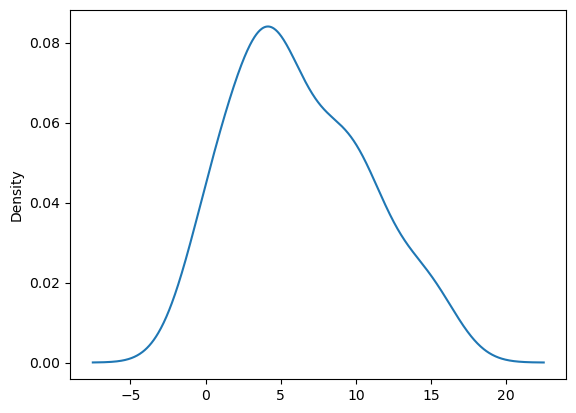

In [24]:
abc['No of Leads'].plot(kind = 'kde')

In [25]:
abc['No of Leads'].skew()

0.43731709795344825

<Axes: >

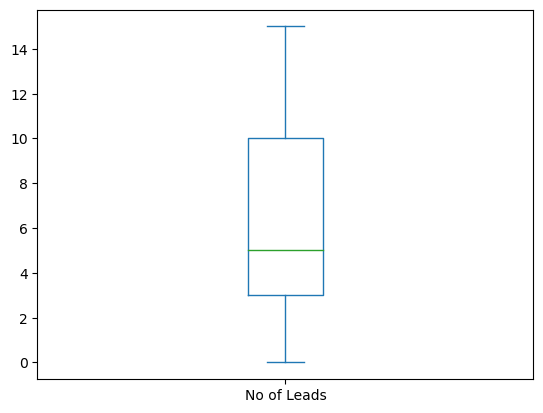

In [26]:
abc['No of Leads'].plot(kind = 'box')

# Time Spent on LG (in mins)

**conclusion**
- "Time Spent on LG (in mins)" is normally(almost) distributed
- There are some outliers

In [27]:
abc['Time Spent on LG (in mins)'].describe()

count     45.000000
mean     331.333333
std      120.672359
min        0.000000
25%      300.000000
50%      300.000000
75%      360.000000
max      540.000000
Name: Time Spent on LG (in mins), dtype: float64

<Axes: ylabel='Frequency'>

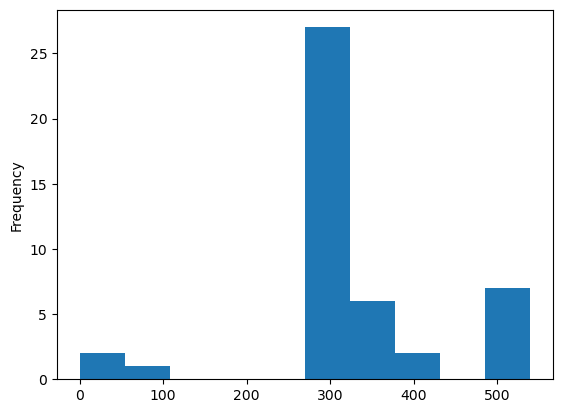

In [28]:
abc['Time Spent on LG (in mins)'].plot(kind = 'hist')

<Axes: ylabel='Density'>

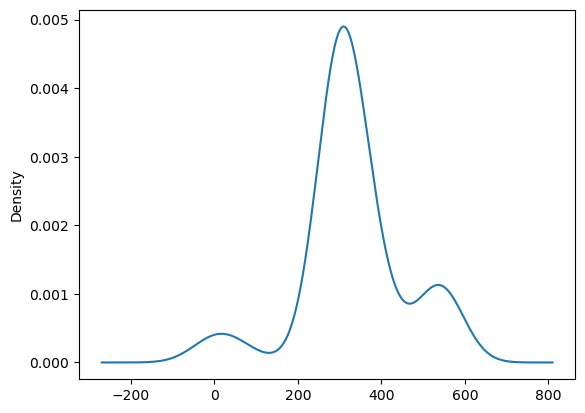

In [29]:
abc['Time Spent on LG (in mins)'].plot(kind = 'kde')

In [30]:
abc['Time Spent on LG (in mins)'].skew()

-0.39137309961589833

<Axes: >

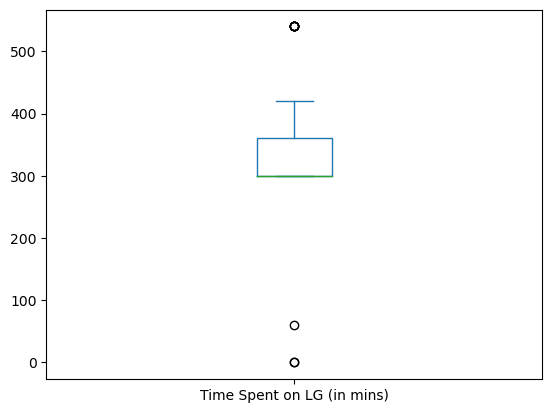

In [31]:
abc['Time Spent on LG (in mins)'].plot(kind = 'box')

In [32]:
abc[(abc['Time Spent on LG (in mins)'] >= 500)]

,Date,No of Leads,Time Spent on LG (in mins),Day
23,2023-02-09,4,540,Thursday
24,2023-02-10,3,540,Friday
25,2023-02-13,15,540,Monday
26,2023-02-14,12,540,Tuesday
27,2023-02-15,4,540,Wednesday
28,2023-02-16,10,540,Thursday
29,2023-02-17,11,540,Friday


In [33]:
abc[(abc['Time Spent on LG (in mins)'] <= 100)]

,Date,No of Leads,Time Spent on LG (in mins),Day
34,2023-02-24,1,60,Friday
39,2023-03-03,0,0,Friday
44,2023-03-10,0,0,Friday


# Associate XYZ

In [34]:
xyz.shape

(61, 3)

In [35]:
xyz.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,10.0,180.0
1,2023-01-10,15.0,300.0
2,2023-01-11,11.0,300.0
3,2023-01-12,11.0,300.0
4,2023-01-13,13.0,300.0


In [36]:
xyz.tail()

,Date,No of Leads,Time Spent on LG (in mins)
56,2023-03-06,12.0,420.0
57,2023-03-07,NaN,NaN
58,2023-03-08,10.0,420.0
59,2023-03-09,9.0,420.0
60,2023-03-10,7.0,360.0


In [37]:
xyz.sample()

,Date,No of Leads,Time Spent on LG (in mins)
52,2023-03-02,10.0,360.0


In [38]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        61 non-null     datetime64[ns]
 1   No of Leads                 41 non-null     float64       
 2   Time Spent on LG (in mins)  41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


In [39]:
xyz.isnull().sum()

Date                           0
No of Leads                   20
Time Spent on LG (in mins)    20
dtype: int64

In [40]:
xyz[xyz.duplicated()]

,Date,No of Leads,Time Spent on LG (in mins)


In [41]:
xyz.describe()

,No of Leads,Time Spent on LG (in mins)
count,41.000000,41.000000
mean,10.853659,387.073171
std,2.555005,82.651192
min,7.000000,180.000000
25%,9.000000,360.000000
50%,10.000000,420.000000
75%,13.000000,420.000000
max,15.000000,600.000000


# Issues with the dataset
   **Dirty data**
   - without Saturday and Sunday, rest of the days value is taken as zero

## Data Cleaning
- Flag Column to identify Employees,Day Column to identify working days(feature Engieering)
- Removing Weekends
- Replacing NUll with 0
- Typecasting (float to int)
- Index resetting

In [42]:
xyz['Day'] = xyz['Date'].dt.day_name()

In [43]:
xyz.head(10)

,Date,No of Leads,Time Spent on LG (in mins),Day
0,2023-01-09,10.0,180.0,Monday
1,2023-01-10,15.0,300.0,Tuesday
2,2023-01-11,11.0,300.0,Wednesday
3,2023-01-12,11.0,300.0,Thursday
4,2023-01-13,13.0,300.0,Friday
5,2023-01-14,NaN,NaN,Saturday
6,2023-01-15,NaN,NaN,Sunday
7,2023-01-16,8.0,390.0,Monday
8,2023-01-17,12.0,420.0,Tuesday
9,2023-01-18,15.0,420.0,Wednesday


In [44]:
 xyz = xyz[~((xyz['Day'] == 'Saturday')|(xyz['Day'] == 'Sunday'))]

In [45]:
xyz.fillna(0, inplace = True)

In [46]:
xyz = xyz.astype({'No of Leads':int,
           'Time Spent on LG (in mins)': int,
                 'Day' : 'category'})

In [47]:
xyz.reset_index(drop = True, inplace = True)

In [48]:
xyz.shape

(45, 4)

# Column Types

- **Numerical** - No of Leads, Time Spent on LG (in mins)
- **Categorical** - Date, Day

## No of Leads

**conclusion**

- The data is negatively skewed
- There are some outliers

In [49]:
xyz['No of Leads']

0     10
1     15
2     11
3     11
4     13
5      8
6     12
7     15
8     15
9     13
10     0
11     9
12    15
13     0
14    15
15     8
16     7
17    13
18    10
19    10
20    13
21     7
22    10
23    10
24     9
25     8
26    12
27    11
28    10
29    10
30     9
31    13
32    10
33     0
34    15
35    15
36     7
37     8
38    10
39    10
40    12
41     0
42    10
43     9
44     7
Name: No of Leads, dtype: int32

In [50]:
xyz['No of Leads'].describe()

count    45.000000
mean      9.888889
std       3.961303
min       0.000000
25%       8.000000
50%      10.000000
75%      13.000000
max      15.000000
Name: No of Leads, dtype: float64

<Axes: ylabel='Frequency'>

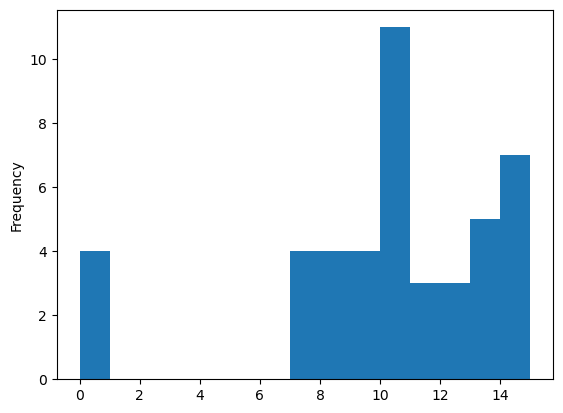

In [51]:
xyz['No of Leads'].plot(kind = 'hist', bins = 15)

<Axes: ylabel='Density'>

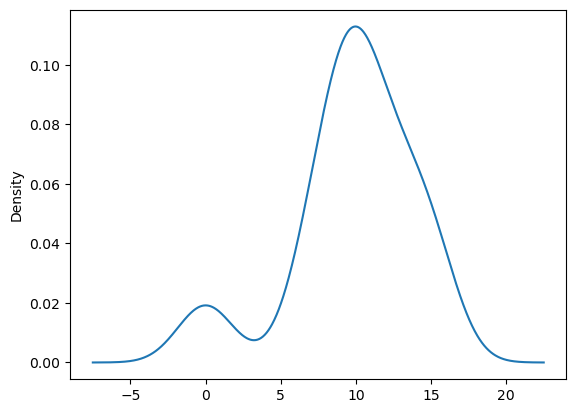

In [52]:
xyz['No of Leads'].plot(kind = 'kde')

In [53]:
xyz['No of Leads'].skew()

-1.1007418187704172

<Axes: >

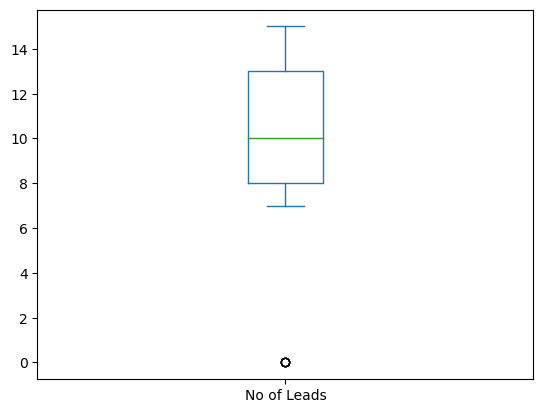

In [54]:
xyz['No of Leads'].plot(kind = 'box')

In [55]:
xyz[(xyz['No of Leads'] <= 7)]

,Date,No of Leads,Time Spent on LG (in mins),Day
10,2023-01-23,0,0,Monday
13,2023-01-26,0,0,Thursday
16,2023-01-31,7,300,Tuesday
21,2023-02-07,7,480,Tuesday
33,2023-02-23,0,0,Thursday
36,2023-02-28,7,180,Tuesday
41,2023-03-07,0,0,Tuesday
44,2023-03-10,7,360,Friday


# Time Spent on LG (in mins)

**conclusion**
- The data is negatively skewed
- There are some outliers

In [56]:
xyz['Time Spent on LG (in mins)'].describe()

count     45.000000
mean     352.666667
std      136.455121
min        0.000000
25%      300.000000
50%      420.000000
75%      420.000000
max      600.000000
Name: Time Spent on LG (in mins), dtype: float64

<Axes: ylabel='Frequency'>

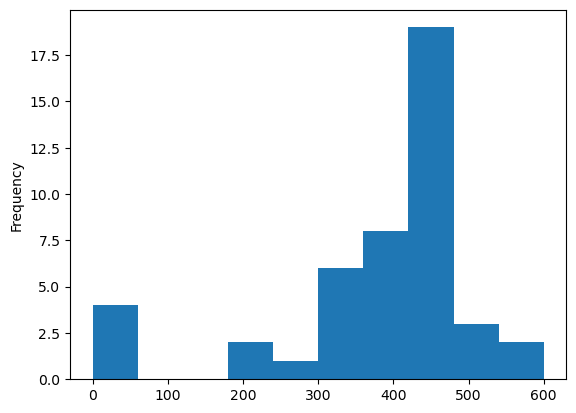

In [57]:
xyz['Time Spent on LG (in mins)'].plot(kind = 'hist')

<Axes: ylabel='Density'>

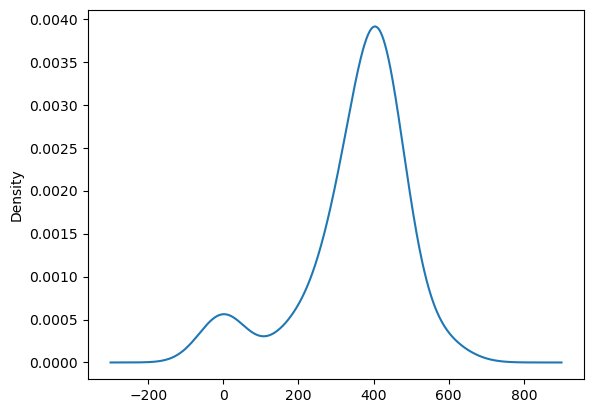

In [58]:
xyz['Time Spent on LG (in mins)'].plot(kind = 'kde')

In [59]:
xyz['Time Spent on LG (in mins)'].skew()

-1.4443925538594835

<Axes: >

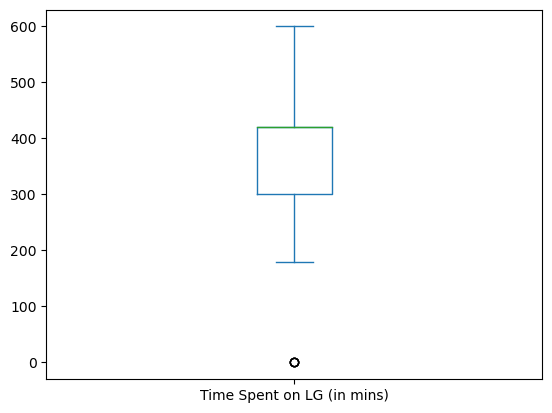

In [60]:
xyz['Time Spent on LG (in mins)'].plot(kind = 'box')

In [61]:
xyz[(xyz['Time Spent on LG (in mins)'] <= 230)]

,Date,No of Leads,Time Spent on LG (in mins),Day
0,2023-01-09,10,180,Monday
10,2023-01-23,0,0,Monday
13,2023-01-26,0,0,Thursday
33,2023-02-23,0,0,Thursday
36,2023-02-28,7,180,Tuesday
41,2023-03-07,0,0,Tuesday


# Associate KLM

In [62]:
klm.shape

(124, 3)

In [63]:
klm.head()

,Date,No of Leads,Time Spent on LG
0,2023-01-09,6.0,540.0
1,2023-01-10,9.0,540.0
2,2023-01-11,NaN,NaN
3,2023-01-12,11.0,540.0
4,2023-01-13,16.0,540.0


In [64]:
klm.tail()

,Date,No of Leads,Time Spent on LG
119,2023-05-08,10.0,420.0
120,2023-05-09,9.0,540.0
121,2023-05-10,8.0,360.0
122,2023-05-11,12.0,420.0
123,2023-05-12,11.0,300.0


In [65]:
klm.sample()

,Date,No of Leads,Time Spent on LG
101,2023-04-20,12.0,420.0


In [66]:
klm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              124 non-null    datetime64[ns]
 1   No of Leads       110 non-null    float64       
 2   Time Spent on LG  107 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.0 KB


In [67]:
klm.isnull().sum()

Date                 0
No of Leads         14
Time Spent on LG    17
dtype: int64

In [68]:
klm[klm.duplicated()]

,Date,No of Leads,Time Spent on LG


In [69]:
klm.describe()

,No of Leads,Time Spent on LG
count,110.000000,107.000000
mean,9.736364,384.766355
std,4.355061,99.464090
min,0.000000,180.000000
25%,6.000000,300.000000
50%,10.000000,360.000000
75%,13.000000,450.000000
max,23.000000,540.000000


# Issues with the dataset
   **Dirty data**
   - without Saturday and Sunday, rest of the days value is taken as zero

## Data Cleaning
- Flag Column to identify Employees,Day Column to identify working days(feature Engieering)
- Replacing NUll with 0
- Typecasting (float to int)
- Including the day worked on Saturday & Sunday
- Index resetting
- Replacing the Null value at index 109 with median
- Renaming column (Time Spent on LG) by (Time Spent on LG(mins)) 


In [70]:
klm['Day'] = klm['Date'].dt.day_name()

In [71]:
klm.fillna(0, inplace = True)

In [72]:
klm.head(5)

,Date,No of Leads,Time Spent on LG,Day
0,2023-01-09,6.0,540.0,Monday
1,2023-01-10,9.0,540.0,Tuesday
2,2023-01-11,0.0,0.0,Wednesday
3,2023-01-12,11.0,540.0,Thursday
4,2023-01-13,16.0,540.0,Friday


In [73]:
klm = klm.astype({'No of Leads':int,
           'Time Spent on LG': int,
                 'Day' : 'category'})

In [74]:
klm = klm[~((klm['No of Leads'] == 0) & ((klm['Day'] == 'Saturday') | (klm['Day'] == 'Sunday')))]

In [75]:
klm.reset_index(drop = True, inplace = True)

In [76]:
klm[(klm['Time Spent on LG'] == 0)]

,Date,No of Leads,Time Spent on LG,Day
2,2023-01-11,0,0,Wednesday
10,2023-01-19,0,0,Thursday
11,2023-01-20,0,0,Friday
15,2023-01-24,0,0,Tuesday
16,2023-01-25,0,0,Wednesday
17,2023-01-26,0,0,Thursday
60,2023-03-13,0,0,Monday
61,2023-03-14,0,0,Tuesday
62,2023-03-15,0,0,Wednesday
63,2023-03-16,0,0,Thursday


In [77]:
klm.iloc[109,2] = klm['Time Spent on LG'].median()

In [78]:
klm.iloc[109]

Date                2023-05-01 00:00:00
No of Leads                          17
Time Spent on LG                    300
Day                              Monday
Name: 109, dtype: object

In [79]:
klm.rename(columns = {'Time Spent on LG' : 'Time Spent on LG (in mins)'}, inplace = True)

In [80]:
klm.sample(15)

,Date,No of Leads,Time Spent on LG (in mins),Day
21,2023-01-30,10,300,Monday
95,2023-04-17,11,300,Monday
60,2023-03-13,0,0,Monday
45,2023-02-24,6,300,Friday
101,2023-04-23,13,480,Sunday
117,2023-05-09,9,540,Tuesday
67,2023-03-20,9,300,Monday
100,2023-04-22,15,420,Saturday
7,2023-01-16,15,540,Monday
83,2023-04-05,0,0,Wednesday


# Column Types

- **Numerical** - No of Leads, Time Spent on LG
- **Categorical** - Date, Day

## No of Leads

**conclusion**

- "No of Lead" is normally(almost) distributed

In [81]:
klm['No of Leads']

0       6
1       9
2       0
3      11
4      16
       ..
116    10
117     9
118     8
119    12
120    11
Name: No of Leads, Length: 121, dtype: int32

In [82]:
klm['No of Leads'].describe()

count    121.000000
mean       8.851240
std        5.012752
min        0.000000
25%        5.000000
50%        9.000000
75%       13.000000
max       23.000000
Name: No of Leads, dtype: float64

<Axes: ylabel='Frequency'>

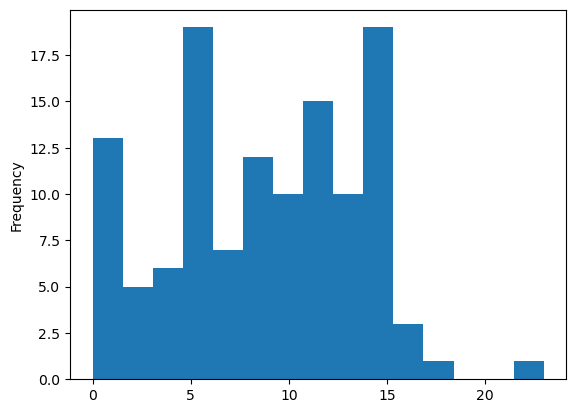

In [83]:
klm['No of Leads'].plot(kind = 'hist', bins = 15)

<Axes: ylabel='Density'>

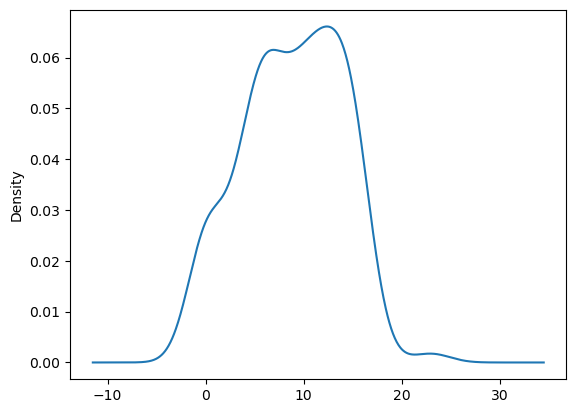

In [84]:
klm['No of Leads'].plot(kind = 'kde')

In [85]:
klm['No of Leads'].skew()

-0.12902059817350672

<Axes: >

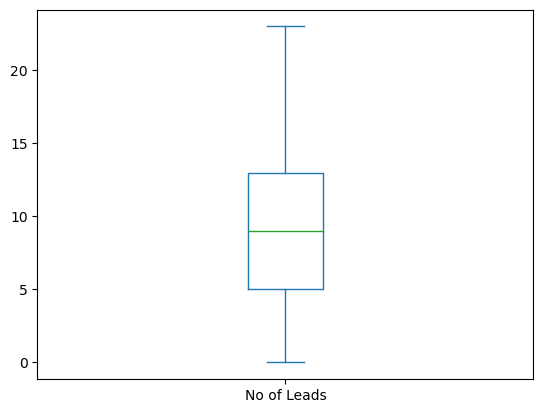

In [86]:
klm['No of Leads'].plot(kind = 'box')

In [87]:
# klm[(klm['No of Leads'] <= 7)]

# Time Spent on LG (in mins)

**conclusion**
- The data is negatively skewed
- There are some outliers

In [88]:
klm['Time Spent on LG (in mins)'].describe()

count    121.000000
mean     342.727273
std      151.838730
min        0.000000
25%      300.000000
50%      300.000000
75%      420.000000
max      540.000000
Name: Time Spent on LG (in mins), dtype: float64

<Axes: ylabel='Frequency'>

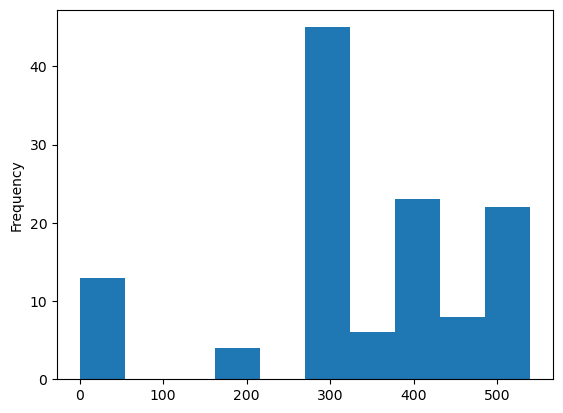

In [89]:
klm['Time Spent on LG (in mins)'].plot(kind = 'hist')

<Axes: ylabel='Density'>

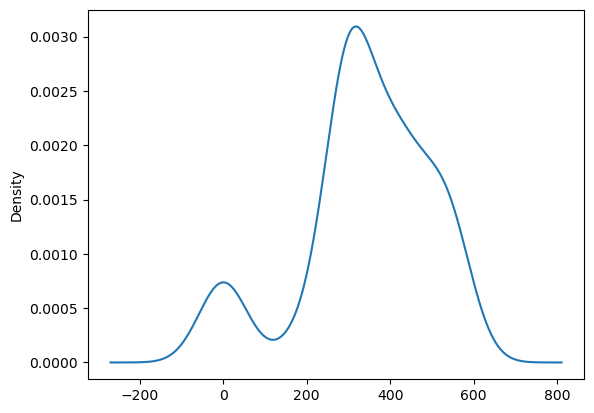

In [90]:
klm['Time Spent on LG (in mins)'].plot(kind = 'kde')

In [91]:
klm['Time Spent on LG (in mins)'].skew()

-0.8578030567950998

<Axes: >

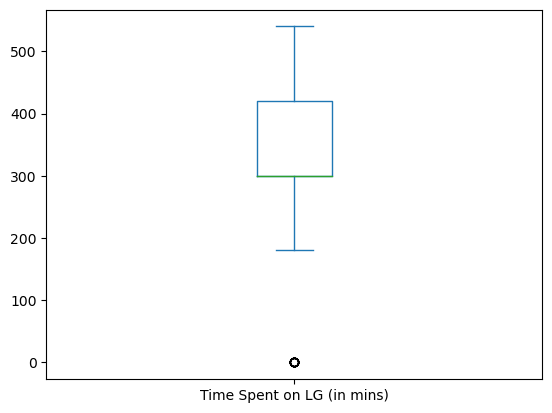

In [92]:
klm['Time Spent on LG (in mins)'].plot(kind = 'box')

In [93]:
klm[(klm['Time Spent on LG (in mins)'] <= 230)]

,Date,No of Leads,Time Spent on LG (in mins),Day
2,2023-01-11,0,0,Wednesday
10,2023-01-19,0,0,Thursday
11,2023-01-20,0,0,Friday
15,2023-01-24,0,0,Tuesday
16,2023-01-25,0,0,Wednesday
17,2023-01-26,0,0,Thursday
18,2023-01-27,12,200,Friday
43,2023-02-22,5,200,Wednesday
60,2023-03-13,0,0,Monday
61,2023-03-14,0,0,Tuesday


In [94]:
abc['Flag'] = 'abc'
abc['Month'] = abc['Date'].dt.month_name()

In [95]:
xyz['Flag'] = 'xyz'
xyz['Month'] = xyz['Date'].dt.month_name()

In [96]:
klm['Flag'] = 'klm'
klm['Month'] = klm['Date'].dt.month_name()

In [97]:
df = pd.concat([abc,xyz,klm], ignore_index = True)

In [98]:
df.head(25)

,Date,No of Leads,Time Spent on LG (in mins),Day,Flag,Month
0,2023-01-09,2,300,Monday,abc,January
1,2023-01-10,1,300,Tuesday,abc,January
2,2023-01-11,5,300,Wednesday,abc,January
3,2023-01-12,4,300,Thursday,abc,January
4,2023-01-13,5,300,Friday,abc,January
5,2023-01-16,5,300,Monday,abc,January
6,2023-01-17,0,300,Tuesday,abc,January
7,2023-01-18,10,300,Wednesday,abc,January
8,2023-01-19,7,300,Thursday,abc,January
9,2023-01-20,6,300,Friday,abc,January


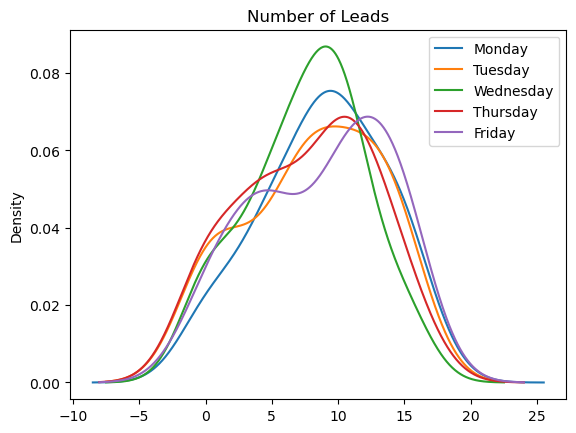

In [99]:
# df[df['Day'] == 'Sunday']['No of Leads'].plot(kind='kde',label='Sunday')
df[df['Day'] == 'Monday']['No of Leads'].plot(kind='kde',label='Monday')
df[df['Day'] == 'Tuesday']['No of Leads'].plot(kind='kde',label='Tuesday')
df[df['Day'] == 'Wednesday']['No of Leads'].plot(kind='kde',label='Wednesday')
df[df['Day'] == 'Thursday']['No of Leads'].plot(kind='kde',label='Thursday')
df[df['Day'] == 'Friday']['No of Leads'].plot(kind='kde',label='Friday')
# df[df['Day'] == 'Saturday']['No of Leads'].plot(kind='kde',label='Saturday')
plt.title('Number of Leads')
plt.legend()
plt.show()

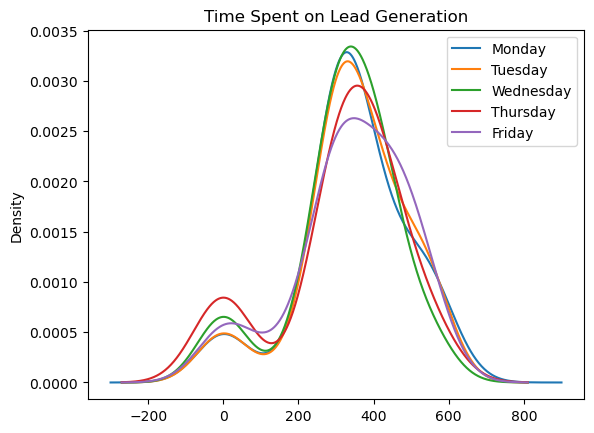

In [100]:
# df[df['Day'] == 'Sunday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Sunday')
df[df['Day'] == 'Monday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Monday')
df[df['Day'] == 'Tuesday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Tuesday')
df[df['Day'] == 'Wednesday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Wednesday')
df[df['Day'] == 'Thursday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Thursday')
df[df['Day'] == 'Friday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Friday')
# df[df['Day'] == 'Saturday']['Time Spent on LG (in mins)'].plot(kind='kde',label='Saturday')

plt.title('Time Spent on Lead Generation')
plt.legend()
plt.show()

# Answers to the following questions:
- What is the total number of leads generated by Each Associate
- What is the total number of leaves taken by each associate (considering Saturday and Sunday as holidays)?
- What is the average number of leads generated by each associate?
- Which associate has been the most consistent in lead generation?

## ABC


In [101]:
# The total number of leads generated by ABC Associate
total_no_lead_abc = abc['No of Leads'].sum()
print("The total number of leads generated by ABC Associate : ", total_no_lead_abc)

The total number of leads generated by ABC Associate :  282


In [102]:
# total number of leaves
leaves_abc = (abc['Time Spent on LG (in mins)'] == 0).sum()
print("total number of leaves : ", leaves_abc)

total number of leaves :  2


In [103]:
# Conversion Rate (Leads Generated per hour)
abc_hour = abc['No of Leads'].sum()/(abc['Time Spent on LG (in mins)'].sum()/60)
print("Conversion Rate (Leads Generated per hour) : ", abc_hour)

Conversion Rate (Leads Generated per hour) :  1.1348088531187124


In [104]:
# Average Leads Generated per day
abc_day = abc['No of Leads'].sum()/abc['Date'].count()
print("Average Leads Generated per day : ", abc_day)

Average Leads Generated per day :  6.266666666666667


In [105]:
# Average Leads Generated per Week
abc_week = abc['No of Leads'].sum()/(abc['Date'].count()/5)
print("Average Leads Generated per Week : ",abc_week)

Average Leads Generated per Week :  31.333333333333332


In [106]:
# Average Time Spent per day.
abc_t_d = (abc['Time Spent on LG (in mins)'].sum()/abc['Date'].count())/60
print("Average Time Spent per day : ", abc_t_d)

Average Time Spent per day :  5.522222222222222


In [107]:
# Average Time Spent per week.
abc_t_w = (abc['Time Spent on LG (in mins)'].sum()/(abc['Date'].count()/5))/60
print("Average Time Spent per week : ", abc_t_w)

Average Time Spent per week :  27.61111111111111


## XYZ

In [108]:
# The total number of leads generated by XYZ Associate
total_no_lead_xyz = xyz['No of Leads'].sum()
print("The total number of leads generated by XYZ Associate : ", total_no_lead_xyz)

The total number of leads generated by XYZ Associate :  445


In [109]:
# total number of leaves
leaves_xyz = (xyz['Time Spent on LG (in mins)'] == 0).sum()
print("total number of leaves : ", leaves_xyz)

total number of leaves :  4


In [110]:
# Conversion Rate (Leads Generated per hour)
xyz_hour = xyz['No of Leads'].sum()/(xyz['Time Spent on LG (in mins)'].sum()/60)
print("Conversion Rate (Leads Generated per hour) : ", xyz_hour)

Conversion Rate (Leads Generated per hour) :  1.6824196597353498


In [111]:
# Average Leads Generated per day
xyz_day = xyz['No of Leads'].sum()/xyz['Date'].count()
print("Average Leads Generated per day : ", xyz_day)

Average Leads Generated per day :  9.88888888888889


In [112]:
# Average Leads Generated per Week
xyz_week = xyz['No of Leads'].sum()/(xyz['Date'].count()/5)
print("Average Leads Generated per Week : ",xyz_week)

Average Leads Generated per Week :  49.44444444444444


In [113]:
# Average Time Spent per day.
xyz_t_d = (xyz['Time Spent on LG (in mins)'].sum()/xyz['Date'].count())/60
print("Average Time Spent per day : ", xyz_t_d)

Average Time Spent per day :  5.877777777777778


In [114]:
# Average Time Spent per week.
xyz_t_w = (xyz['Time Spent on LG (in mins)'].sum()/(xyz['Date'].count()/5))/60
print("Average Time Spent per week : ", xyz_t_w)

Average Time Spent per week :  29.38888888888889


## KLM


In [115]:
# The total number of leads generated by KLM Associate
total_no_lead_klm = klm['No of Leads'].sum()
print("The total number of leads generated by KLM Associate : ", total_no_lead_klm)

The total number of leads generated by KLM Associate :  1071


In [116]:
# total number of leaves
leaves_klm = (klm['Time Spent on LG (in mins)'] == 0).sum()
print("total number of leaves : ", leaves_klm)

total number of leaves :  13


In [117]:
# Conversion Rate (Leads Generated per hour)
klm_hour = klm['No of Leads'].sum()/(klm['Time Spent on LG (in mins)'].sum()/60)
klm_hour

1.5495538943814806

In [118]:
# Average Leads Generated per day
klm_day = klm['No of Leads'].sum()/klm['Date'].count()
print("Average Leads Generated per day : ", klm_day)

Average Leads Generated per day :  8.851239669421487


In [119]:
# Average Leads Generated per Week
klm_week = klm['No of Leads'].sum()/(klm['Day'] == 'Monday').sum()
print("Average Leads Generated per Week : ", klm_week)

Average Leads Generated per Week :  59.5


In [120]:
# Average Time Spent per day.
klm_t_d = (klm['Time Spent on LG (in mins)'].sum()/klm['Date'].count())/60
print("Average Time Spent per day : ", klm_t_d)

Average Time Spent per day :  5.712121212121213


In [121]:
# Average Time Spent per week.
klm_t_w = (klm['Time Spent on LG (in mins)'].sum()/(klm['Day'] == 'Monday').sum())/60
print("Average Time Spent per week : ", klm_t_w)

Average Time Spent per week :  38.398148148148145


In [122]:
# Total Leads Generated over the given time period.
print("Total number of leads generated by ABC : ",total_no_lead_abc)
print("Total number of leads generated by XYZ : ",total_no_lead_xyz)
print("Total number of leads generated by KLM : ",total_no_lead_klm)
print("Total number of leads generated by ABC, XYZ, KLM : ", df['No of Leads'].sum())

Total number of leads generated by ABC :  282
Total number of leads generated by XYZ :  445
Total number of leads generated by KLM :  1071
Total number of leads generated by ABC, XYZ, KLM :  1798


In [123]:
# average number of leads generated by all associate (per DAY)
avg_lead_per_day = (abc_day + xyz_day + klm_day)/3
print("average number of leads generated by all associate : ", avg_lead_per_day)

average number of leads generated by all associate :  8.33559840832568


In [124]:
# Average Time Spent per day by each associate
print("Average Time Spent per day by each associate : ",(abc_t_d + xyz_t_d + klm_t_d)/3)

Average Time Spent per day by each associate :  5.704040404040405


In [125]:
# Average conversion Rate (Leads Generated per hour) of each associate
print("Average conversion Rate (Leads Generated per hour) of each associate : ", (abc_hour + xyz_hour + klm_hour)/3)

Average conversion Rate (Leads Generated per hour) of each associate :  1.455594135745181


In [126]:
# Average conversion Rate (Leads Generated per week) of each associate
print("Average conversion Rate (Leads Generated per week) of each associate : ", (abc_week + xyz_week + klm_week)/3)

Average conversion Rate (Leads Generated per week) of each associate :  46.75925925925926



# Next Month Projection

In [127]:
nmp = pd.date_range(start = '2023/12/1',end = '2023/12/31',freq = 'B')

In [128]:
nmp = pd.DataFrame(nmp)

In [129]:
nmpabc = nmp.value_counts().sum() * abc_day
print("Projection for next Month (ABC) : ", nmpabc)

Projection for next Month (ABC) :  131.6


In [130]:
nmpxyz = nmp.value_counts().sum() * xyz_day
print("Projection for next Month (XYZ) : ", nmpxyz)

Projection for next Month (XYZ) :  207.66666666666669


In [131]:
nmpklm = nmp.value_counts().sum() * klm_day
print("Projection for next Month (KLM) : ", nmpklm)

Projection for next Month (KLM) :  185.87603305785123


In [132]:
print("Projection for next Month (DECEMBER) including all employees : ",nmpabc + nmpxyz + nmpklm)

Projection for next Month (DECEMBER) including all employees :  525.1426997245179


In [133]:
x = ['ABC', 'XYZ', 'KLM']
y = [nmpabc, nmpxyz, nmpklm]

[Text(0.5, 1.0, 'Projection'), Text(0, 0.5, 'No of Leads generated')]

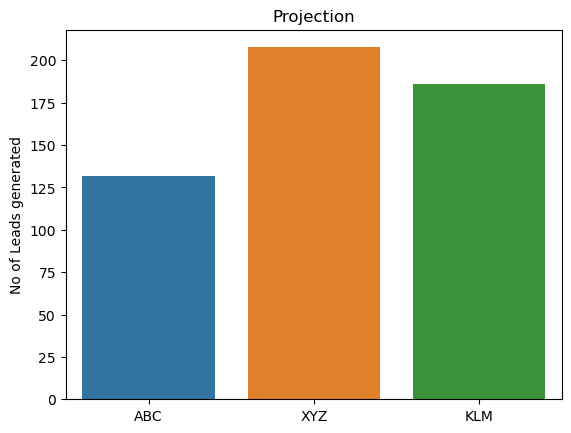

In [134]:
sns.barplot(data = df,x = x, y = y).set(title = "Projection", ylabel = 'No of Leads generated')